In [204]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate

In [205]:
# data = load_breast_cancer()
# x = data.data
# y = data.target

In [206]:
import pandas as pd
data = pd.read_csv('pleaseFinal/final_with_wavelets.csv', index_col=0)
data.tail()

,ID,background_tissue,class,severity,x,y,rad,mean,var,std,...,80,81,82,83,84,85,86,87,88,89
302,mdb318,D,NORM,2,442,68,50.0,14.033015,0.505857,0.711236,...,0.005631,0.005673,0.005622,0.005519,0.005574,0.005585,0.005657,0.005522,0.005617,0.005573
303,mdb319,D,NORM,2,590,281,50.0,145.912938,28.130725,5.303841,...,0.057100,0.056467,0.057069,0.055745,0.056172,0.057144,0.057615,0.062998,0.055317,0.056784
304,mdb320,D,NORM,2,495,264,50.0,195.578840,470.810515,21.698168,...,0.086635,0.090627,0.078840,0.089521,0.072025,0.071708,0.072373,0.084510,0.090469,0.090238
305,mdb321,D,NORM,2,604,271,50.0,177.764946,30.464061,5.519426,...,0.071060,0.066745,0.070574,0.076844,0.071334,0.068290,0.067408,0.066900,0.066901,0.070000
306,mdb322,D,NORM,2,460,115,50.0,8.994009,7.767332,2.786993,...,0.007118,0.003161,0.002935,0.003165,0.005478,0.006992,0.005488,0.006882,0.003087,0.003116


In [207]:
x = data.loc[:,'mean':]
y = data['severity']

In [156]:
max_list = [max(x.iloc[:,i]) for i in range(6)]
max_list

[235.79521708846062,
 9077.42759925985,
 95.27553515598773,
 214.0,
 242.0,
 0.9554140127388534]

In [157]:
#Normalize data
for i in range(6):
    for j in range(len(x)):
        x.iloc[j,i] = x.iloc[j,i]/max_list[i]

In [158]:
x

,mean,var,std,min_pixel,max_pixel,bdips,mean_canny,var_canny,std_canny,mean_erode,...,80,81,82,83,84,85,86,87,88,89
0,0.639458,0.353129,0.594247,0.023364,0.913223,0.000007,68.343054,12756.705742,112.945588,145.328215,...,0.077495,0.057131,0.000132,0.047860,0.047598,0.047088,0.047985,0.026360,0.048619,0.055781
1,0.839164,0.084224,0.290214,0.350467,0.946281,0.000058,52.692153,10660.036075,103.247451,193.119138,...,0.086103,0.076059,0.075255,0.083965,0.086875,0.086078,0.074783,0.070293,0.085699,0.085855
2,0.634470,0.045081,0.212324,0.392523,0.772727,0.000091,78.099965,13815.886498,117.540999,142.003899,...,0.035906,0.038000,0.039495,0.037046,0.035816,0.037235,0.054409,0.064430,0.037220,0.053017
3,0.688844,0.008833,0.093983,0.598131,0.747934,0.000605,75.261669,13527.406777,116.307381,156.487977,...,0.061391,0.052185,0.068811,0.053869,0.055789,0.062539,0.069416,0.051520,0.068235,0.068537
4,0.781972,0.014001,0.118325,0.724299,0.859504,0.000300,82.057788,14191.255387,119.127056,178.766207,...,0.064772,0.064836,0.065186,0.063458,0.065509,0.065687,0.066656,0.068120,0.064197,0.064024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.059514,0.000056,0.007465,0.051402,0.144628,0.000670,0.585086,148.854615,12.200599,13.095857,...,0.005631,0.005673,0.005622,0.005519,0.005574,0.005585,0.005657,0.005522,0.005617,0.005573
303,0.618812,0.003099,0.055668,0.607477,0.694215,0.000120,80.319312,14030.232648,118.449283,141.277884,...,0.057100,0.056467,0.057069,0.055745,0.056172,0.057144,0.057615,0.062998,0.055317,0.056784
304,0.829444,0.051866,0.227741,0.682243,0.938017,0.000004,60.491396,11766.096962,108.471641,190.905163,...,0.086635,0.090627,0.078840,0.089521,0.072025,0.071708,0.072373,0.084510,0.090469,0.090238
305,0.753895,0.003356,0.057931,0.761682,0.822314,0.000027,79.701721,13971.574509,118.201415,173.387763,...,0.071060,0.066745,0.070574,0.076844,0.071334,0.068290,0.067408,0.066900,0.066901,0.070000


In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=42, stratify = y)

# KNN

In [209]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(15)}
reg = KNeighborsClassifier()
model = GridSearchCV(reg, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

C:\Users\linhvt22\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\linhvt22\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\linhvt22\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\linhvt22\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\linhvt22\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. 

{'n_neighbors': 10}

In [210]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
print("Test set R^2: {:.2f}".format(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)
y_pred

Test set R^2: 0.53


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2], dtype=int64)

In [211]:
np.array(y_test)

array([2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0], dtype=int64)

In [212]:
y_scores = knn.predict_proba(x_test)
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [213]:
scores = cross_validate(knn, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)


{'fit_time': array([0.01563668, 0.        , 0.01562524, 0.        , 0.        ]), 'score_time': array([0.        , 0.01557803, 0.        , 0.        , 0.        ]), 'test_score': array([0.56451613, 0.56451613, 0.52459016, 0.52459016, 0.55737705]), 'train_score': array([0.62040816, 0.63265306, 0.62601626, 0.67073171, 0.6504065 ])}


# SVM


In [214]:
svm = sklearn.svm.SVC(C = 30, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=30)

In [215]:
svm.score(x_train, y_train)


0.6204081632653061

In [216]:
svm.score(x_test, y_test)


0.6129032258064516

In [168]:
y_pred = svm.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [169]:
y_scores = svm.predict(x_test)
fpr_svm, tpr_svm, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [170]:
from sklearn.model_selection import cross_validate
scores = cross_validate(svm, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.03128862, 0.01573014, 0.        , 0.01565981, 0.01562738]), 'score_time': array([0.        , 0.        , 0.01559854, 0.        , 0.        ]), 'test_score': array([0.62903226, 0.62903226, 0.60655738, 0.60655738, 0.62295082]), 'train_score': array([0.61632653, 0.61632653, 0.62195122, 0.62195122, 0.61788618])}


# Decision Tree


In [171]:
from sklearn.tree import DecisionTreeClassifier


In [172]:

# tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree = DecisionTreeClassifier(max_depth=5,random_state=42)

In [173]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [174]:
y_pred = tree.predict(x_test)

In [175]:
print('Độ chính xác tập huấn luyện: {:.4f}'.format(tree.score(x_train, y_train)))
print('Độ chính xác tập kiểm tra: {:.4f}'.format(tree.score(x_test, y_test)))

Độ chính xác tập huấn luyện: 0.8735
Độ chính xác tập kiểm tra: 0.6935


In [176]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [177]:
print_score(tree, x_train, y_train, x_test, y_test, train=True)

Train Result:

accuracy score: 0.8735

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.65      0.76        54
           1       0.94      0.73      0.82        41
           2       0.85      0.99      0.92       150

    accuracy                           0.87       245
   macro avg       0.90      0.79      0.83       245
weighted avg       0.88      0.87      0.87       245


Confusion Matrix: 
 [[ 35   1  18]
 [  3  30   8]
 [  0   1 149]]

Average Accuracy: 	 0.5922
Accuracy SD: 		 0.0959


In [178]:
print_score(tree, x_train, y_train, x_test, y_test, train=False)

Test Result:

accuracy score: 0.6935

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.33      0.30      0.32        10
           2       0.76      0.82      0.78        38

    accuracy                           0.69        62
   macro avg       0.61      0.59      0.60        62
weighted avg       0.69      0.69      0.69        62


Confusion Matrix: 
 [[ 9  0  5]
 [ 2  3  5]
 [ 1  6 31]]



In [179]:
y_scores = tree.predict_proba(x_test)
fpr_tree, tpr_tree, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_tree = auc(fpr_tree, tpr_tree)

In [180]:
scores = cross_validate(tree, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00973773, 0.01560879, 0.        , 0.00951076, 0.0156374 ]), 'score_time': array([0.01566029, 0.        , 0.01562333, 0.        , 0.        ]), 'test_score': array([0.58064516, 0.62903226, 0.67213115, 0.59016393, 0.72131148]), 'train_score': array([0.89795918, 0.87346939, 0.87398374, 0.87398374, 0.86178862])}


# Random forest


In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rf = RandomForestClassifier(n_estimators=10,max_depth=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [183]:
print_score(rf, x_train, y_train, x_test, y_test, train=True)
print('\n')
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.8980

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       1.00      0.59      0.74        41
           2       0.89      1.00      0.94       150

    accuracy                           0.90       245
   macro avg       0.92      0.81      0.85       245
weighted avg       0.91      0.90      0.89       245


Confusion Matrix: 
 [[ 46   0   8]
 [  6  24  11]
 [  0   0 150]]

Average Accuracy: 	 0.6335
Accuracy SD: 		 0.1052


Test Result:

accuracy score: 0.6935

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.60      0.30      0.40        10
           2       0.76      0.92      0.83        38

    accuracy                           0.69        62
   macro avg       0.61      0.53      0.54        62
weighted avg       0.67      0.69      0.67   

In [184]:
y_scores = rf.predict_proba(x_test)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [185]:
scores = cross_validate(rf, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.03647184, 0.03127623, 0.03128457, 0.02076077, 0.02076054]), 'score_time': array([0.01561475, 0.        , 0.        , 0.00218892, 0.01031661]), 'test_score': array([0.67741935, 0.53225806, 0.62295082, 0.63934426, 0.72131148]), 'train_score': array([0.91836735, 0.88571429, 0.91056911, 0.91869919, 0.91056911])}


In [186]:
x

,mean,var,std,min_pixel,max_pixel,bdips,mean_canny,var_canny,std_canny,mean_erode,...,80,81,82,83,84,85,86,87,88,89
0,0.639458,0.353129,0.594247,0.023364,0.913223,0.000007,68.343054,12756.705742,112.945588,145.328215,...,0.077495,0.057131,0.000132,0.047860,0.047598,0.047088,0.047985,0.026360,0.048619,0.055781
1,0.839164,0.084224,0.290214,0.350467,0.946281,0.000058,52.692153,10660.036075,103.247451,193.119138,...,0.086103,0.076059,0.075255,0.083965,0.086875,0.086078,0.074783,0.070293,0.085699,0.085855
2,0.634470,0.045081,0.212324,0.392523,0.772727,0.000091,78.099965,13815.886498,117.540999,142.003899,...,0.035906,0.038000,0.039495,0.037046,0.035816,0.037235,0.054409,0.064430,0.037220,0.053017
3,0.688844,0.008833,0.093983,0.598131,0.747934,0.000605,75.261669,13527.406777,116.307381,156.487977,...,0.061391,0.052185,0.068811,0.053869,0.055789,0.062539,0.069416,0.051520,0.068235,0.068537
4,0.781972,0.014001,0.118325,0.724299,0.859504,0.000300,82.057788,14191.255387,119.127056,178.766207,...,0.064772,0.064836,0.065186,0.063458,0.065509,0.065687,0.066656,0.068120,0.064197,0.064024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.059514,0.000056,0.007465,0.051402,0.144628,0.000670,0.585086,148.854615,12.200599,13.095857,...,0.005631,0.005673,0.005622,0.005519,0.005574,0.005585,0.005657,0.005522,0.005617,0.005573
303,0.618812,0.003099,0.055668,0.607477,0.694215,0.000120,80.319312,14030.232648,118.449283,141.277884,...,0.057100,0.056467,0.057069,0.055745,0.056172,0.057144,0.057615,0.062998,0.055317,0.056784
304,0.829444,0.051866,0.227741,0.682243,0.938017,0.000004,60.491396,11766.096962,108.471641,190.905163,...,0.086635,0.090627,0.078840,0.089521,0.072025,0.071708,0.072373,0.084510,0.090469,0.090238
305,0.753895,0.003356,0.057931,0.761682,0.822314,0.000027,79.701721,13971.574509,118.201415,173.387763,...,0.071060,0.066745,0.070574,0.076844,0.071334,0.068290,0.067408,0.066900,0.066901,0.070000


# Neural Network


In [201]:
# build model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(105,)))
Dropout(0.25)
model.add(Dense(units=256, activation='relu'))
Dropout(0.25)
model.add(Dense(units=3, activation='softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               27136     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 771       
Total params: 93,699
Trainable params: 93,699
Non-trainable params: 0
_________________________________________________________________


In [188]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, stratify = y_train)

In [189]:
y_train = keras.utils.to_categorical(y_train, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)
# print('categorical y_train: ', y_train.shape)
# print('categorical y_val : ', y_val.shape)
# print('categorical y_test : ', y_test.shape)

In [202]:
from tensorflow.keras.optimizers import SGD
# Compile model
epochs = 100
lr = 0.001
# decay = lr/epochs
# sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=lr), metrics=['accuracy'])

In [203]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(x_val, y_val))

Epoch 1/100
3/3 [==============================] - 1s 152ms/step - loss: 135032.3815 - accuracy: 0.3815 - val_loss: 45371.2266 - val_accuracy: 0.2258
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 669754.2139 - accuracy: 0.2015 - val_loss: 165382684672.0000 - val_accuracy: 0.6129
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 102191357952.0000 - accuracy: 0.4912 - val_loss: 91196992.0000 - val_accuracy: 0.2258
Epoch 4/100
3/3 [==============================] - 0s 34ms/step - loss: 7957984991774009982976.0000 - accuracy: 0.2964 - val_loss: 172850287738880.0000 - val_accuracy: 0.2258
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 3294636481952347724972032.0000 - accuracy: 0.3053 - val_loss: 34121057620823577571717283840.0000 - val_accuracy: 0.6129
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 19052782483034713588737507328.0000 - accuracy: 0.4721 - val_loss: 648366.0000 - val_accuracy: 0.6

Epoch 58/100
3/3 [==============================] - 0s 27ms/step - loss: 1.0049 - accuracy: 0.6146 - val_loss: 1.0049 - val_accuracy: 0.6129
Epoch 59/100
3/3 [==============================] - 0s 31ms/step - loss: 1.0157 - accuracy: 0.5970 - val_loss: 1.0046 - val_accuracy: 0.6129
Epoch 60/100
3/3 [==============================] - 0s 27ms/step - loss: 1.0114 - accuracy: 0.6048 - val_loss: 1.0044 - val_accuracy: 0.6129
Epoch 61/100
3/3 [==============================] - 0s 34ms/step - loss: 1.0126 - accuracy: 0.5892 - val_loss: 1.0041 - val_accuracy: 0.6129
Epoch 62/100
3/3 [==============================] - 0s 31ms/step - loss: 1.0093 - accuracy: 0.5912 - val_loss: 1.0039 - val_accuracy: 0.6129
Epoch 63/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0016 - accuracy: 0.6107 - val_loss: 1.0037 - val_accuracy: 0.6129
Epoch 64/100
3/3 [==============================] - 0s 32ms/step - loss: 0.9979 - accuracy: 0.6107 - val_loss: 1.0034 - val_accuracy: 0.6129
Epoch 65/100


In [146]:
# save model as json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model-norm2.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


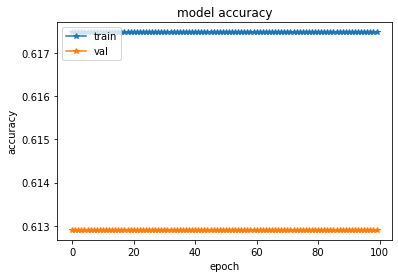

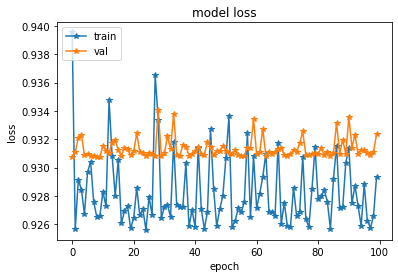

In [198]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = "*")
plt.plot(history.history['val_accuracy'], marker = "*")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = "*")
plt.plot(history.history['val_loss'], marker = "*")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [199]:
score = model.evaluate(x_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.9323 - accuracy: 0.6129
Test loss: 0.9323426485061646
Test accuracy: 0.6129032373428345


In [200]:
y_scores = model.predict(x_test)
fpr_nn, tpr_nn, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_nn = auc(fpr_nn, tpr_nn)

ValueError: multilabel-indicator format is not supported

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_knn, tpr_knn, label = "knn")
ax.plot(fpr_svm, tpr_svm, label = "svm")
ax.plot(fpr_tree, tpr_tree, label = "tree")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_nn, tpr_nn, label = "nn")

# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()